#### CIE4604 Simulation and Visualization
# Module 2 Satellite Orbits - Exercise 1

**Hans van der Marel, 15 November 2020** (updated 15 November 2021)

In this exercise you download NORAD Two-Line Elements (TLE) to compute and visualize orbits for Earth observations satellites in Low and Medium Earth orbits.

## Explore the crsutil.py and tleplot.py Python modules

Download `CIE4604-M2-python.zip` from Brightspace and unzip this in your current working directory. This should give
you two Python files: `crsutil.py` and `tleplot.py`. the download also contains a file with coastlines and an example TLE file.

For this Jupyter notebook to work, the Jupyter notebook should be in the same folder as the two modules. Import the modules using the following statements:

In [2]:
import crsutil as crs
import tleplot as tle

To list the names of all the functions and variables defined in the module type `dir(module)` or use `module?` to display the docstring of the module 
```Python
dir(crs)
crs?
```

In [3]:
dir(crs)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'cart2pol',
 'datetime',
 'datetime2num',
 'ecef2eci',
 'eci2ecef',
 'inqell',
 'kepler',
 'keplerm',
 'keplernu',
 'np',
 'num2datetime',
 'orb2vec',
 'parsedate',
 'plh2xyz',
 'pol2cart',
 'prtlookangle',
 'satlookanglesp',
 'ut2gmst',
 'vec2orb',
 'xyz2plh']

In [4]:
crs?

Type:        module
String form: <module 'crsutil' from 'd:\\Grad_School\\_Year_2\\Q2\\sim_vis\\module2\\CIE4604-M2-python\\crsutil.py'>
File:        d:\grad_school\_year_2\q2\sim_vis\module2\cie4604-m2-python\crsutil.py
Docstring:  
----------------------------------------------------------------------------
crsutil.py    CRSUTIL Coordinate and Time Reference System Toolbox.
Version 1.1 (14 November 2020).
Created by: Hans van der Marel, Ullas Rajvanshi and Simon van Diepen
Date:       14 Nov 2020
Modified:   -

Copyright: Hans van der Marel, Ullas Rajvanshi, Simon van Diepen, Delft University of Technology
Email:     h.vandermarel@tudelft.nl
Github:    -
----------------------------------------------------------------------------
Functions:

Coordinate transformations (ECEF reference frame)

  xyz2plh     - Cartesian Coordinates to Ellipsoidal coordinates
  plh2xyz     - Ellipsoidal coordinates to Cartesian Coordinates
  inqell      - Semi-major axis, flattening and GM for various el

To get the docs for a specific function, use `help(functionname)` or `functionname?`. 
```Python
help(crs.orb2vec)
```
Try this out yourself for several functions...

In [5]:
help(crs.orb2vec)

Help on function orb2vec in module crsutil:

orb2vec(orb, GM=398600441800000.0)
    ORB2VEC   Convert Keplerian elements into inertial state vector.
    SVEC=ORB2VEC(ORB) converts the vector ORB with 6 Keplerian elements
    into the 6-element inertial state vector SVEC with cartesian position and
    velocity (X, Y, Z, Xdot, Ydot, Zdot). The Keplerian elements are
          ORB(:,1)    Semi-major axis (meters),
          ORB(:,2)    Eccentricity (unity),
          ORB(:,3)    Inclination (radians),
          ORB(:,4)    Right ascension of the ascending node (radians),
          ORB(:,5)    Argument of the pericenter (radians),
          ORB(:,6)    True anomaly (radians).
    This routine is fully vectorized, if ORB is a matrix then SVEC
    will be a matrix of the same size. One of the dimensions of the input
    matrix must be 6. The units are meter, meter/sec or radians.
    
    SVEC=ORB2VEC(ORB,GM) provides an optional gravitational parameter of the
    central body. Default for 

You see that `crsutil` contains functions for coordinate and time related operations. The ones we are interested in now are the

- GMST and UT1 conversions
- Keplerian elements

The other functions will come in handy as well. 

These are however not the main functions we use. The interesting ones are in `tleplot.py`. To see what is available type
```
dir(tle)
tle?
```
We use `tle` because this is how `tlelot` was imported.

In [ ]:
tle?

The main functions we are going to use are `tleget`, `tleread`, `tle2vec` and `tleplot`. Other functions that are handy are `tlefind` and `tledatenum`.

We explain them in the next sections.

## Download TLE for Earth Resource Satellites from Celestrak

The Two-Line-Elements for a large number of satellites can be downloaded from http://www.celestrak.com/NORAD/elements .

The direct download link for **Earth Resource Satellites** is http://www.celestrak.com/NORAD/elements/resource.txt. 
You can use your favourite browser to download this file and save this file in the current folder. You can also use the function `tleget` to download the file
```
filename = tleget('resource')
```
`filename` will get the value `resource.txt`. If you want to download to another file do something like this
```
filename = tleget('resource','resource-17-Nov-2020.tle')
```
A file called `resource_10-Oct-2017.tle` is already provided in the zip file. You may skip the download step and use this file, but the `resource.txt` downloaded from Celestrak will give you the most up-to-date elements.

In [6]:
filename = tle.tleget('resource')

Saving TLE set to default name
TLEGET: Downloaded resource.txt from http://celestrak.com/NORAD/elements/
Saved TLE to resource.txt


See also `help(tle.tleget)`

In [ ]:
help(tle.tleget)

## Read Two-line element files

The function `tleread` reads the NORAD Two-Line-Elements (TLE), which contain the Keplerian elements for Earth orbiting satellites, from file. To find out how it's works type `help(tle.tleread)`.

In [8]:
help(tle.tleread)

Help on function tleread in module tleplot:

tleread(fname, verbose=1)
    Read NORAD Two Line Elements from file.
    
    tle = tleread(fname) reads NORAD two line elements from file with name 
    fname and returns the two-line elements (TLE's) in a list tle of named tuples.
    
    The mean orbital elements contained in tle are Earth-centered-inertial (ECI)
    coordinates with respect to the true equator of date and the mean equinox
    of date. They do not include the effect of nutation. The tle are 
    compatible with the SGP4 and SDP4 orbit propagators of NORAD.
    
    Files with TLE's can be obtained from www.celestrak.com. You may use
    the function tleget to do this. The TLE files can have an optional line 
    with a twenty-four character name before the traditional Two Line Element 
    format (Three-Line Elemement Set).
    
    The function takes an optional argument verbose, if verbose=1 (default) 
    an overview of the TLE's is printed, if verbose=0 the function

To read the TLE you’ve just downloaded do something like this
```
tleERS =  tle.tleread(filename)
tleERS =  tle.tleread('resource.txt')
```
using the `filename` returned by `tleget` or an explicit filename. The output is a list of named tuples, which we have given the name `tleERS`. You may of course use a different name.

In [7]:
tleERS=tle.tleread('resource.txt')


Satellite              Reference_Epoch    a [km]    ecc [-]  inc [deg] RAAN [deg] argp [deg]    E [deg]    Period

SCD 1                   2021-319.77347   7121.38  0.0043176    24.9695    92.1184    79.6558    34.3086  01:39:41
TECHSAT 1B (GO-32)      2021-319.78565   7190.93  0.0001808    98.7890   265.0315    42.3449   317.7868  01:41:09
SCD 2                   2021-319.65564   7122.97  0.0017477    24.9963   306.1705    89.4175    71.8052  01:39:43
LANDSAT 7               2021-320.26119   7080.32  0.0001781    98.0128    11.5951    79.5689   280.5711  01:38:49
DLR-TUBSAT              2021-320.05251   7099.03  0.0015342    98.4644   255.8156    52.5996   307.6590  01:39:13
TERRA                   2021-320.18364   7080.58  0.0001135    98.1628    31.7187    98.8317   282.2157  01:38:49
MAROC-TUBSAT            2021-320.18880   7377.17  0.0020548    99.5943    95.9508   121.0393    54.8785  01:45:06
AQUA                    2021-320.15805   7080.67  0.0001386    98.2241   259.3938   11

During the reading `tleread` prints some useful information about the two-line elements in the file. 

Do you recognize the parameters that are printed? How many minutes is the typical orbital period?

If you don't want all this output you can do use `verbose=0` to suppress the output,
```
tleERS = tle.tleread('resource.txt', verbose=0)
```
The results are saved in a structure array, e.g. `tleERS`, you can choose the name yourself. Check what is inside the structure array by typing `tleERS`, or `tleERS[:2]`, to see the first two entries

In [9]:
tleERS[:2]

[TLE(name='SCD 1', satid=(22490, 'U', '93009B'), ephtype=('0', 999), year=2021, epoch=319.77346596, t0=18946.77346596, ecc0=0.0043175999999999996, inc0=0.4357999875767241, raan0=1.6077693816691443, argp0=1.3902559783100992, m0=0.5987788331279545, n0=90.76872058983915, ndot=1.457698991265664e-05, nddot=0.0, bstar=1.3670000000000001e-05, revnum=1862, a0=7121382.2656928, e0=0.5987974003012471),
 TLE(name='TECHSAT 1B (GO-32)', satid=(25397, 'U', '98043D'), ephtype=('0', 999), year=2021, epoch=319.7856539, t0=18946.7856539, ecc0=0.0001808, inc0=1.7241933147526782, raan0=4.625672296499351, argp0=0.7390579264277469, m0=5.546427724705968, n0=89.45507304651855, ndot=1.2566370614359172e-07, nddot=0.0, bstar=2.0482e-05, revnum=1302, a0=7190931.055895895, e0=5.546426250887271)]

For instance, the mean anomaly is stored in `tle[k].m0` and mean motion in `tle[k].n0`. 
The reference epoch `t0` is stored in two parts, the year in `tle[k].year` and 
day of year in `tle[k].epoch`. This information is not really interesting
as most functions use `tle` and you don't realy care how the information is stored in
the structure array.

In [10]:
print('satellite, m0:',tleERS[1].name, tleERS[1].m0)
print('satellite, year, epoch:',tleERS[25].name, tleERS[25].year, tleERS[25].epoch)

satellite, m0: TECHSAT 1B (GO-32) 5.546427724705968
satellite, year, epoch: RADARSAT-2 2021 320.07330537


As you can see there are many Earth Resource satellites stored in `tleERS`. We need to have a method to find particular satellites in the structure array `tleERS`.

## Selecting satellites using `tlefind`

To find particular satellites in `tleERS` use the function `tlefind`. E.g. to find all satellites with ‘RA’ in the name do 
```
isat, satnames = tlefind(tleERS,’RA’)
```
Do `help(tlefind)` to see what the function does. 

To specifically find Radarsat-2 type
```
isat, satnames = tlefind(tleERS,’RADARSAT-2’)
```
If you don't type the full name of the satellite a list with matching satellites is returned.

Try this our yourself, and see what is in the variables that are returned. What is in `isat`?

In [11]:
isat, satnames = tle.tlefind(tleERS,'RA')
print('isat:',isat)

Found 12 satellites:
 TERRA  (5)
 AURA  (11)
 ARIRANG-2 (KOMPSAT-2)  (16)
 TERRASAR-X  (21)
 RADARSAT-2  (25)
 RASAT  (47)
 ARIRANG-3 (KOMPSAT-3)  (54)
 SARAL  (61)
 ARIRANG-5 (KOMPSAT-5)  (64)
 NUSAT-11 (CORA)  (162)
 NUSAT-18 (VERA)  (168)
 NUSAT-20 (GRACE)  (175)
isat: [  5  11  16  21  25  47  54  61  64 162 168 175]


In [ ]:
isat, satnames = tle.tlefind(tleERS,'RADARSAT-2')
print('isat:',isat)

In [ ]:
help(tle.tlefind)

## Compute satellite position and velocity for Radarsat-2

The function `tle2vec` is used to compute satellite positions and velocity. 
`tle2vec` requires three inputs: 

- the named tuple list `tleERS` with two-line elements, 
- a date, daterange similar to used by `tledatenumber` or an array with Matlab datenumbers `t`, and 
- the satellite identifier. This can be a name or position in `tleERS` 

To obtain the position and velocity at a specific date type e.g.
```
xsat, vsat = tle2vec(tleERS,'2017-10-10 0:00:00','RADARSAT-2')
```
The function is vectorized,  to compute more than one epoch, you can specify multiple epochs. There are basically three ways you can do this

1. Create a vector t using the following code (cumbersome), e.g. 
```
t1 = datenum(‘2017-10-10 0:00:00’);
t = np.arange([t1, t1+1, 1/(24*60)])
```
Make sure that the epoch you choose is within a few days of the reference epoch for the Two-Line-Elements.<br/><br/>

2.	Use  tledatenum to create a vector with times (preferred method), e.g.
```
t = tledatenum(['2013-9-13 0:00:00', 24*60 ,1])
```
Then call  `xsat, vsat = tle2vec(tleERS,t,'RADARSAT-2')`.<br/><br/>

3. Use the `tledatenum` range specification directly in the call to `tle2vec`,
```
xsat, vsat = tle2vec(tleERS, ['2013-9-13 0:00:00', 24*60 ,1],'RADARSAT-2')
```
This form is only useful in case you are not interested in the values of *t* itself.

`tle2vec` returns the satellite position in `xsat` and velocity in `vsat`. `xsat` and `vsat` have shape \[*n*,3\], with *n* the number of epochs in *t*.

Type `help(tle2vec)` to find out more on `tle2vec` and `help(tledatenum)` to find out more on the `tledatenum` range specification. 

In [ ]:
help(tle.tle2vec)

In [ ]:
help(tle.tledatenum)

To compute the position and velocity of RADARSAT-2 you need two things

- the named typle list `tleERS` with two-line elements (including those of RADARSAT-2)
- a daterange specification or array with datenumbers

**Make sure that the datarange specification you choose is within a few days of the reference epoch for the Two-Line-Elements in tleERS for accurate results!**

Below are a couple of examples.

In [12]:
xsat, vsat = tle.tle2vec(tleERS,['2021-11-15 0:00:00'],'RADARSAT-2')
print('xsat',xsat)
print('vsat',vsat)

xsat [[ 5312783.95423506 -3176943.38850743 -3618892.80592904]]
vsat [[ 2519.21340739 -3007.3657054   6339.94321066]]


In [13]:
t = tle.tledatenum(['2021-11-15 0:00:00', 24*60 ,1])
xsat, vsat = tle.tle2vec(tleERS,t,'RADARSAT-2')
print('t',t)
print('xsat',xsat)
print('vsat',vsat)

t [18946.         18946.00069444 18946.00138889 ... 18946.99861111
 18946.99930555 18947.        ]
xsat [[ 5312783.95423506 -3176943.38850743 -3618892.80592904]
 [ 5453513.64638332 -3350984.90572359 -3231789.89975328]
 [ 5573035.95822819 -3511989.1624549  -2832119.7969029 ]
 ...
 [ 1713525.3197684  -2400340.78381479  6534413.57011104]
 [ 1357841.27442577 -2180876.98031381  6692989.2049744 ]
 [  996880.2385326  -1952947.81378717  6825542.33653957]]
vsat [[ 2519.21340739 -3007.3657054   6339.94321066]
 [ 2169.9963931  -2795.57584938  6562.1749187 ]
 [ 1812.32958444 -2572.91857654  6758.88684987]
 ...
 [-5880.96112982  3584.55453898  2858.49828042]
 [-5980.64342723  3733.1032633   2429.38681902]
 [-6057.07777622  3867.13545589  1990.83592098]]


In [14]:
xsat, vsat = tle.tle2vec(tleERS,['2021-11-15 0:00:00', 24*60 ,1],'RADARSAT-2')
print('xsat',xsat)
print('vsat',vsat)

xsat [[ 5312783.95423506 -3176943.38850743 -3618892.80592904]
 [ 5453513.64638332 -3350984.90572359 -3231789.89975328]
 [ 5573035.95822819 -3511989.1624549  -2832119.7969029 ]
 ...
 [ 1713525.3197684  -2400340.78381479  6534413.57011104]
 [ 1357841.27442577 -2180876.98031381  6692989.2049744 ]
 [  996880.2385326  -1952947.81378717  6825542.33653957]]
vsat [[ 2519.21340739 -3007.3657054   6339.94321066]
 [ 2169.9963931  -2795.57584938  6562.1749187 ]
 [ 1812.32958444 -2572.91857654  6758.88684987]
 ...
 [-5880.96112982  3584.55453898  2858.49828042]
 [-5980.64342723  3733.1032633   2429.38681902]
 [-6057.07777622  3867.13545589  1990.83592098]]


`tle2vec` returns the satellite position in `xsat` and velocity in `vsat`. `xsat` and `vsat` have shape \[*n*,3\], with *n* the number of epochs in *t*.
`tle2vec` returns arrays with the position and velocity in the ECI reference frame. 

To plot the velocity so something like
```
plt.figure("Velocity")
plt.plot(t, vsat[:, 0]/1000, linewidth=2, label="V_X")
plt.plot(t, vsat[:, 1]/1000, linewidth=2, label="V_Y")
plt.plot(t, vsat[:, 2]/1000, linewidth=2, label="V_Z")
plt.plot(t, velsat/1000, linewidth=2, color='k', label="V")
plt.title("{} velocity in ECI".format(satid))
plt.ylabel("km/s")
plt.xlabel("Date")
plt.legend()
``` 

See for example the code below, where all the necessary packages are imported, including reading of two-line elements.

Found 1 satellites:
 RADARSAT-2  (25)
(1441,)
(1441, 3)


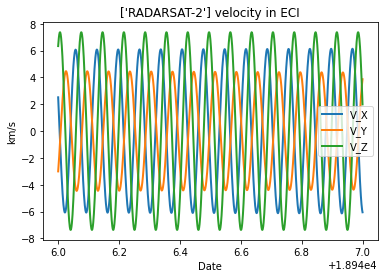

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tleplot as tle

tleERS=tle.tleread('resource.txt',verbose=0)

isat, satnames = tle.tlefind(tleERS,'RADARSAT-2')
t = tle.tledatenum(['2021-11-15 0:00:00', 24*60 ,1])
xsat, vsat = tle.tle2vec(tleERS,t,isat)

print(t.shape)
print(vsat.shape)
plt.figure("Velocity")
plt.plot(t, vsat[:, 0]/1000, linewidth=2, label="V_X")
plt.plot(t, vsat[:, 1]/1000, linewidth=2, label="V_Y")
plt.plot(t, vsat[:, 2]/1000, linewidth=2, label="V_Z")
plt.title("{} velocity in ECI".format(satnames))
plt.ylabel("km/s")
plt.xlabel("Date")
plt.legend() 

Note that in the above we passed to `tle2vec` the position in `tleERS` instead of the name of the satellite. This is sometimes more convenient.

If the satellite name in the call to `tle2vec` is not unique `tle2vec` will complain and print a list of satellites, try
```
  xsat, vsat = tle2vec(tleERS,['2020-11-15 0:00:00'],'SENTINEL-1')
```

In [16]:
xsat, vsat = tle.tle2vec(tleERS,['2020-11-15 0:00:00'],'SENTINEL-1')

ValueError: Satellite SENTINEL-1 not unique in provided TLE!

There are two Sentinel-1 satellites, you must select one. Instead of the satellite name you can also give the element number in `tleERS`, as returned by `tlefind`. This is useful if you want to loop over more than one satellite.

In [17]:
tleERS=tle.tleread('resource.txt', verbose=0)
isats, satnames = tle.tlefind(tleERS, 'SENTINEL-1', verbose=0)
for satname in satnames:
    xsat, vsat = tle.tle2vec(tleERS,['2020-11-15 0:00:00'], str(satname))
    print('satname: {}, pos: {}, vel: {}'.format(satname,xsat,vsat))

for isat in isats:
    xsat, vsat = tle.tle2vec(tleERS,['2020-11-15 0:00:00'], isat)
    print('satnum: {}, pos: {}, vel: {}'.format(isat,xsat,vsat))
    

satname: SENTINEL-1A, pos: [[-3164002.35435813  3230290.9247982  -5440043.75199281]], vel: [[ 5131.58370674 -2850.58721792 -4678.60976463]]
satname: SENTINEL-1B, pos: [[ 2940421.0067555  -3118925.20837654  5627240.18248778]], vel: [[-5264.95758283  3014.45452185  4420.61730232]]
satnum: 68, pos: [[-3164002.35435813  3230290.9247982  -5440043.75199281]], vel: [[ 5131.58370674 -2850.58721792 -4678.60976463]]
satnum: 104, pos: [[ 2940421.0067555  -3118925.20837654  5627240.18248778]], vel: [[-5264.95758283  3014.45452185  4420.61730232]]


## Algorithm for computing satellite position and velocity from TLE

Have a look at `tle2vec`and the functions it is calling so see how the computation 
is done. 6.	 Which functions are called and what do they do? 

Make a structure diagram and compare the computations against the lecture notes to put them in context. For instance, which method is the  default propagation model that is used?

The business part of `tle2vec` is
```
# Find the satellite SATID

isat=tlefind(tleERS,'RADARSAT-2') 

# Compute satellite state vectors (position and velocity in ECI)

propagation='J2'                           # Propagation method for orbital elements
orb=tle2orb(tle[isat],t,propagation);      # Matrix of orbit elements
vec=orb2vec(orb);                          # State vector

xsat=vec[:,1:3]
vsat=vec[:,4:6]
```
The function `tle2orb` computes the matrix of orbital (Kepler) elements for the time vector *t* from the two-line elements. The third argument is the *orbit propagation* method. The default orbit propagation method is `J2`, which 
takes the flattening of the Earth into account. The recommended orbit
propagation method for two-line elements is `SGP4`, but this is currently not implemented
in the Python function. The propagation method `NOJ2` ignores the effect 
of J2 on the orbit propagation, which yields very unrealistic results in the long 
term. 

The function `orb2vec` (from `crsutil`) converts the orbital (Kepler) elements into the
state-vector. 

The orbit propagation code for `NOJ2`, ignoring effect of J2, in `tle2orb` is in pseudo code
```
t0 = datenum(tle[isat].year,1,1) + tle[isat].epoch - 1
m = tle[isat].m0 + tle[isat].n0 * (t-t0)          # Mean anomaly 
ignore,nu = keplerm(m, tle[isat].ecc0)            # True anomaly
orb= [ ...                                        # Matrix of orbit elements 
   repmat([ tle[isat].a0 tle[isat].ecc0 tle[isat].inc0 tle[isat].raan0 tle[isat].argp0 ],size(nu)) ...
         nu ];            
```
It uses `keplerm` from the `crsutil` module to solve Kepler's equation and compute from the mean anomaly the true anomaly. The orbital elements are stored in the matrix `orb`; for the first five columns the values in each row are the 
same, only column six contains a time varying variable (the true anomaly). 

## Plotting satellite position, velocity and tracks

The function `tleplot1` can be used to plot the satellite position, velocity and (ground) tracks. 

To view the help on `tleplot1` type
```
help(tleplot1)
```
Actually, `tleplot1` calls `tle2vec` and then plots the results. The first three
arguments are also the same as for `tle2vec1`. The fourth optional argument is new, this is a
vector with the spherical coordinates of the observer which is needed to compute the
the elevation and azimuth of the satellite from an observer.

For example, to plot position, velocity and (ground) tracks you can use the following call
with three input arguments 
```
tleplot1(tleERS,['2020-11-15 0:00:00', 24*60 ,1],'RADARSAT-2')
```
This produces several plots

- plots of satellite positions and velocity in the ECI as function of time,
- plot with the right ascession and declination in ECI, or, satellite track in ECI. Timestamps are plotted for the first epochs, followed by an addtional 15 timestamps for the remainder of the period,
- ground track of the satellite (ECEF, longitude and latitude),
- 3D representations in ECI end ECEF

Below we import the `tleplot` module, read two-line elements for Earth resouce satellites using `tleread`, and then plot using `tleplot1` 

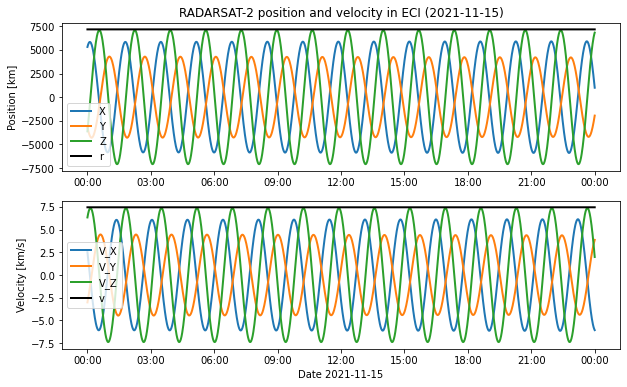

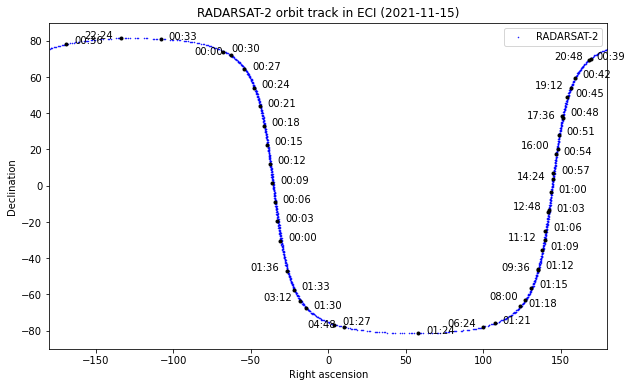

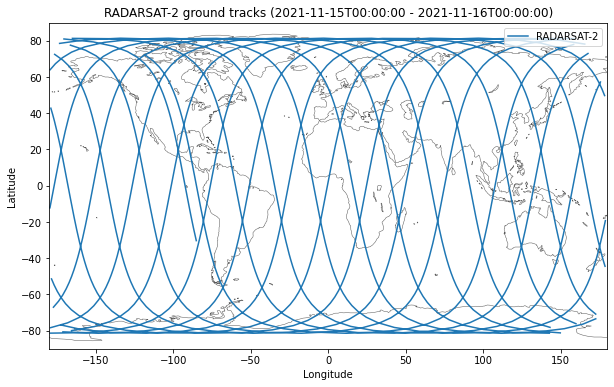

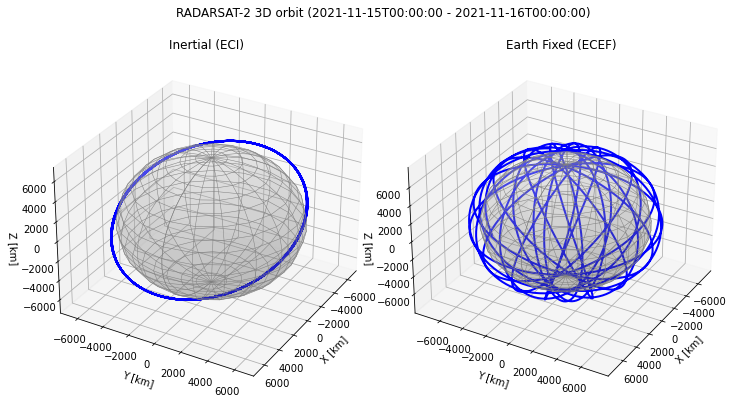

In [18]:
import tleplot as tle

tleERS=tle.tleread('resource.txt',verbose=0)
tle.tleplot1(tleERS,['2021-11-15 0:00:00', 24*60 ,1],'RADARSAT-2')

Take you time to understand what is plotted. 

Also note that the day you select for plotting is not too far off from the date you downloaded the two-line elements. 

In [19]:
tle.tleplot1?

Signature: tle.tleplot1(tle, daterange, satid, objcrd=None, figsize=(10, 6))
Docstring:
Plot satellite position and velocity from NORAD Two Line Elements.

tleplot1(tle,daterange,satid) plots the satellite position and 
velocities in various ways. tle is a list with named tuples containing
two line elements read by tleread. daterange is a list with the start date, 
end date (or duration) and data interval. The duration and data interval 
are in minutes. satid is a character string with the name of the satellite 
to plot. 

tleplot1(tle,daterange,satid,objcrd) add's the position of an observer 
with coordinates objcrd to the plots. objcrd are the geographical 
coordinates with latitude and longitude (in degrees), and height (in meters) 
of the observer or object on Earth.

Example:
   tleERS=tleread('resource.txt')
   tleplot1(tleERS,{'2013-9-13 0:00', 24*60 ,1},'RADARSAT-2')
   tleplot1(tleERS,{'2013-9-13 0:00', 24*60 ,1},'RADARSAT-2',[ 52 4.8  0 ])

Files with TLE's can be obtained fr

## Plotting satellite visibility and elevation angles

To plot the satellite visibility for an observer you have to add a fourth argument with the observer position to `tleplot1`.

For example, to plot position, velcity, ground tracks and satellite visibility for Delft,
use
```
tleplot1(tleERS,['2020-11-15 0:00:00', 24*60 ,1],'RADARSAT-2',[ 52, 4.8,  0 ])
```
This adds two more plots

- plots with the range, range-rate, elevation angle and azimuth angle. When the satellite is not visible the lines are dotted.
- skyplot as seen from the observer

and modifies the other other plots.

In the plot of
the ground tracks the positions that are visible from Delft are plotted
with crosses. Note that in plots that use an ECI referenced frame the 
position of the observer is changing over time.

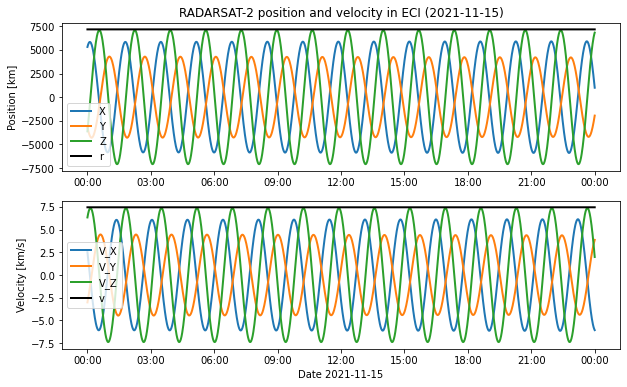

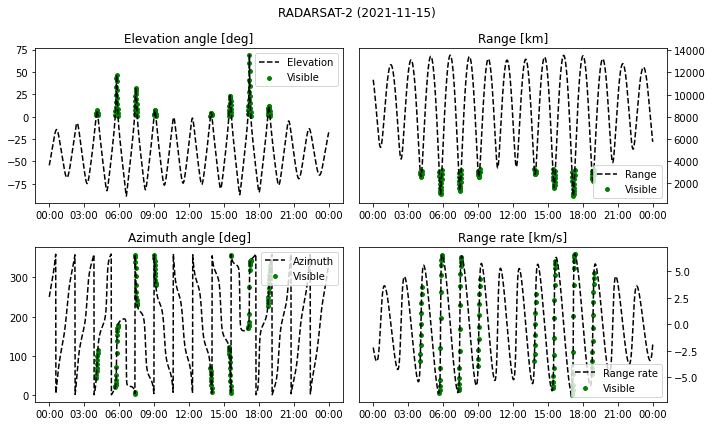

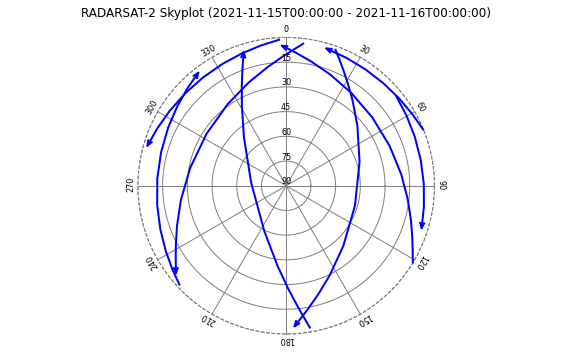

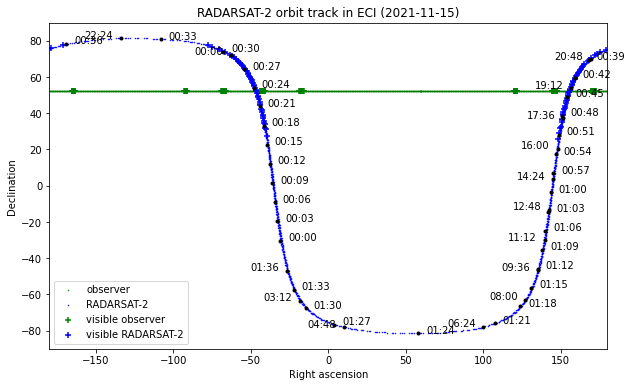

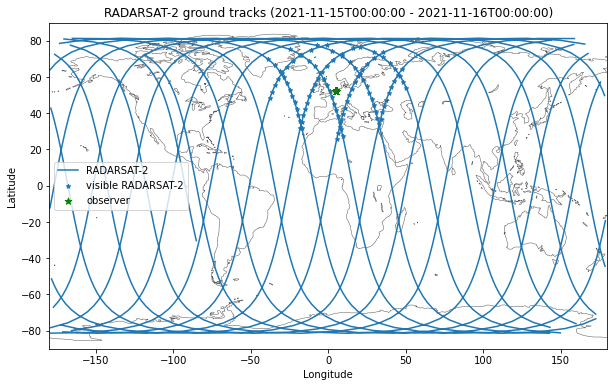

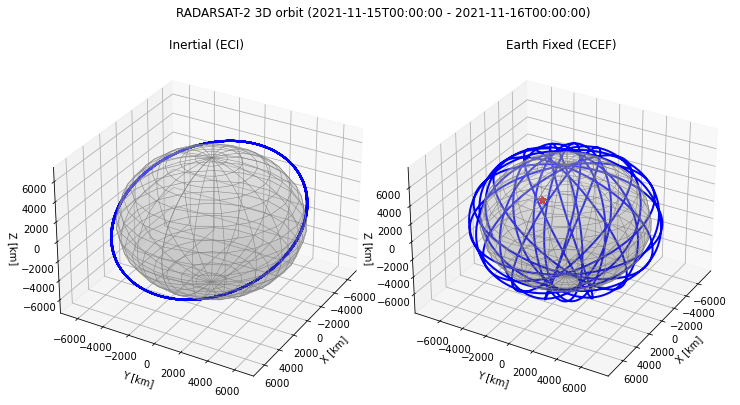

In [20]:
tle.tleplot1(tleERS,['2021-11-15 0:00:00', 24*60 ,1],'RADARSAT-2',[ 52, 4.8,  0 ])

You can use these functions to plot the orbits for other satellites with two-line-elements.

You can check out the code in `tleplot1.m` to find out what 
is going on and how the various plots are produced. 


The function `tleplot1` is just a convenience method doing a lot of plots at the same time. For serious work (e.g. your assignment) it is *not* recommended to use `tleplot` directly, but you may reuse some of the code for your purposes. 

[End of this Jupyter notebook]